# Data Analysis

This notebook will showcase a bit of data analysis of the datasets given. I will take a look at some control datasets that look over the following regions:

* North Atlantic
* Subtropical Gyres

In [1]:
import pandas as pd
import numpy as np

# preprocessing
from sklearn.preprocessing import StandardScaler

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [104]:
data_path = '/home/emmanuel/projects/2020_ml_ocn/data/RAW/CONTROL/'
control_gp1 = 'NORTH_ATLANTIC'
control_gp2 = 'SUBTROPICAL_GYRES'

## Import Data

First we will look at the

### Core Variables

For the first steps, we will look at the core variables. These include:

* Latitude
* Longitude
* Spectral Variables
    * 412, 443, 490, 555, 670
* PAR
* Sea Surface Anomaly
* Mixed Layer Depth (MLD)

**Meta-Data**

* Day of the Year
* number of cycles
* wmo

So roughly 8 variables in total (not including the 2 meta-variables)

In [97]:
data_path = '/home/emmanuel/projects/2020_ml_ocn/data/RAW/CONTROL/'

CORE_VARS = [
    'sla', 'PAR', 'RHO_WN_412', 'RHO_WN_443', "RHO_WN_490",
    "RHO_WN_555", "RHO_WN_670",
    "MLD",
]

CORE_OUTS = [
    'sla',
]
LOCATION_VARS = [
    'lat', 'lon', 'doy',

]
META_VARS = [
    'wmo', 'n_cycle'
]

In [110]:
def load_control_data(control='na'):
    
    # choose control group data
    if control == 'na':
        region = 'NORTH_ATLANTIC'
        filename_ext = 'NA'
    elif control == 'stg':
        region = 'SUBTROPICAL_GYRES'
        filename_ext = 'STG'
    else:
        raise ValueError(f"Unrecognized control group: {control}")
    
    # Load Data
    X = pd.read_csv(f"{data_path}{region}/X_INPUT_{filename_ext}.csv")
    y = pd.read_csv(f"{data_path}{region}/BBP_OUTPUT_{filename_ext}.csv")
    
    return X, y

In [101]:
X_na, Y_na = load_control_data(control='na')

In [105]:
X_features = X_na[CORE_VARS]

X_features.head()

sla      PAR  RHO_WN_412  RHO_WN_443  RHO_WN_490  RHO_WN_555  \
0  5.421500  44.7510    0.026754    0.021997    0.016902    0.004928   
1  5.845199  45.2395    0.025535    0.020452    0.016493    0.004793   
2  0.756100  50.9293    0.007764    0.009328    0.009720    0.003551   
3  0.326600  50.8669    0.007064    0.008832    0.009639    0.003629   
4  0.326300  53.1347    0.020773    0.019439    0.015983    0.005122   

   RHO_WN_670  MLD  
0    0.000069   50  
1    0.000119   58  
2    0.000421   52  
3    0.000407   62  
4    0.000562   54

### General Statistics for the Datasets

In [106]:
X_features.describe()

sla          PAR   RHO_WN_412   RHO_WN_443   RHO_WN_490  \
count  3022.000000  3022.000000  3022.000000  3022.000000  3022.000000   
mean     -1.023435    42.587315     0.017911     0.015458     0.013138   
std       6.241974    13.341398     0.010524     0.007983     0.005180   
min     -47.530300     7.658160     0.000789     0.001000     0.001829   
25%      -4.710750    33.493225     0.010973     0.010070     0.010000   
50%      -1.061400    44.568950     0.014952     0.013515     0.012166   
75%       2.866325    53.848125     0.021841     0.018442     0.015337   
max      29.168600    63.337100     0.063060     0.052012     0.053483   

        RHO_WN_555   RHO_WN_670          MLD  
count  3022.000000  3022.000000  3022.000000  
mean      0.006466     0.000970    92.319656  
std       0.002834     0.000447   145.681095  
min       0.002191     0.000004    10.000000  
25%       0.004785     0.000662    20.000000  
50%       0.005929     0.000991    40.000000  
75%       0.007369     0.001151    82.000000  
max       0.036277     0.005287   995.000000

At a first glance, I think we will have to normalized the data for sure. Beacuse the values are all over the place. Fairly standard procedure.

### Locations

To get a feel for the locations, we can simply use the lat, lon values to display the locations on a map. I used tips from this [blog](https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972)

In [107]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

def get_geodataframe(dataframe: pd.DataFrame)-> gpd.GeoDataFrame:
    """This function will transform the dataset from a 
    pandas.DataFrame to a geopandas.DataFrame which will
    have a special column for geometry. This will make plotting 
    a lot easier."""
    # get polygons
    geometry = [Point(xy) for xy in zip(X_na['lon'], X_na['lat'])]
    
    # coordinate systems
    crs = {'init': 'epsg:4326'}
    
    # create dataframe
    gpd_df = gpd.GeoDataFrame(
        dataframe,
        crs=crs,
        geometry=geometry
    )
    return gpd_df

In [108]:
gpd_df = get_geodataframe(X_na)

gpd_df.head()

wmo  n_cycle       sla      PAR  RHO_WN_412  RHO_WN_443  RHO_WN_490  \
0  3902122       42  5.421500  44.7510    0.026754    0.021997    0.016902   
1  3902122       43  5.845199  45.2395    0.025535    0.020452    0.016493   
2  3902122       49  0.756100  50.9293    0.007764    0.009328    0.009720   
3  3902122       50  0.326600  50.8669    0.007064    0.008832    0.009639   
4  3902122       51  0.326300  53.1347    0.020773    0.019439    0.015983   

   RHO_WN_555  RHO_WN_670  MLD        lon        lat  doy  \
0    0.004928    0.000069   50 -27.221187  12.073372    1   
1    0.004793    0.000119   58 -27.042640  12.199892    6   
2    0.003551    0.000421   52 -26.491484  11.554463   36   
3    0.003629    0.000407   62 -26.471429  11.441130   41   
4    0.005122    0.000562   54 -26.447072  11.427888   46   

                     geometry  
0  POINT (-27.22119 12.07337)  
1  POINT (-27.04264 12.19989)  
2  POINT (-26.49148 11.55446)  
3  POINT (-26.47143 11.44113)  
4  POINT (-26.44707 11.42789)

For plotting, it's a bit more involved but we can do it quite easily. I found some help from these resources:

* 
* 

In [75]:
def plot_geolocations(gpd_df: gpd.GeoDataFrame)-> None:
    
    # get the background map
    path = gpd.datasets.get_path('naturalearth_lowres')
    world_df = gpd.read_file(path)
    
    # initialize figure
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # add background world map
    world_df.plot(ax=ax, color='gray')
    
    # add the locations of the dataset
    gpd_df.plot(ax=ax, color='red', markersize=2)

    plt.show()

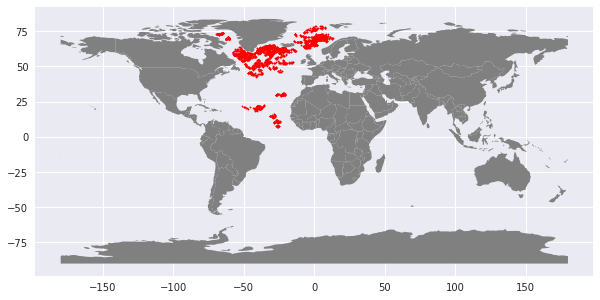

In [76]:
plot_geolocations(gpd_df)

Looks pretty good. All the points seem to be in the Northern atlantic area. Some also seem near the equator and there are not many of them. So I wonder if that will effect the results.

### PairPlots

First and foremost, I would like to look at the pairplots of the variables. Just to see what we're dealing with. I'll do the unnormalized and unnormalized versions.

In [32]:
def plot_pairplots(dataframe: pd.DataFrame)-> None:
        
    fig = plt.figure(figsize=(10,10))
    
    pts = sns.pairplot(dataframe)
    
    plt.show()

<Figure size 720x720 with 0 Axes>

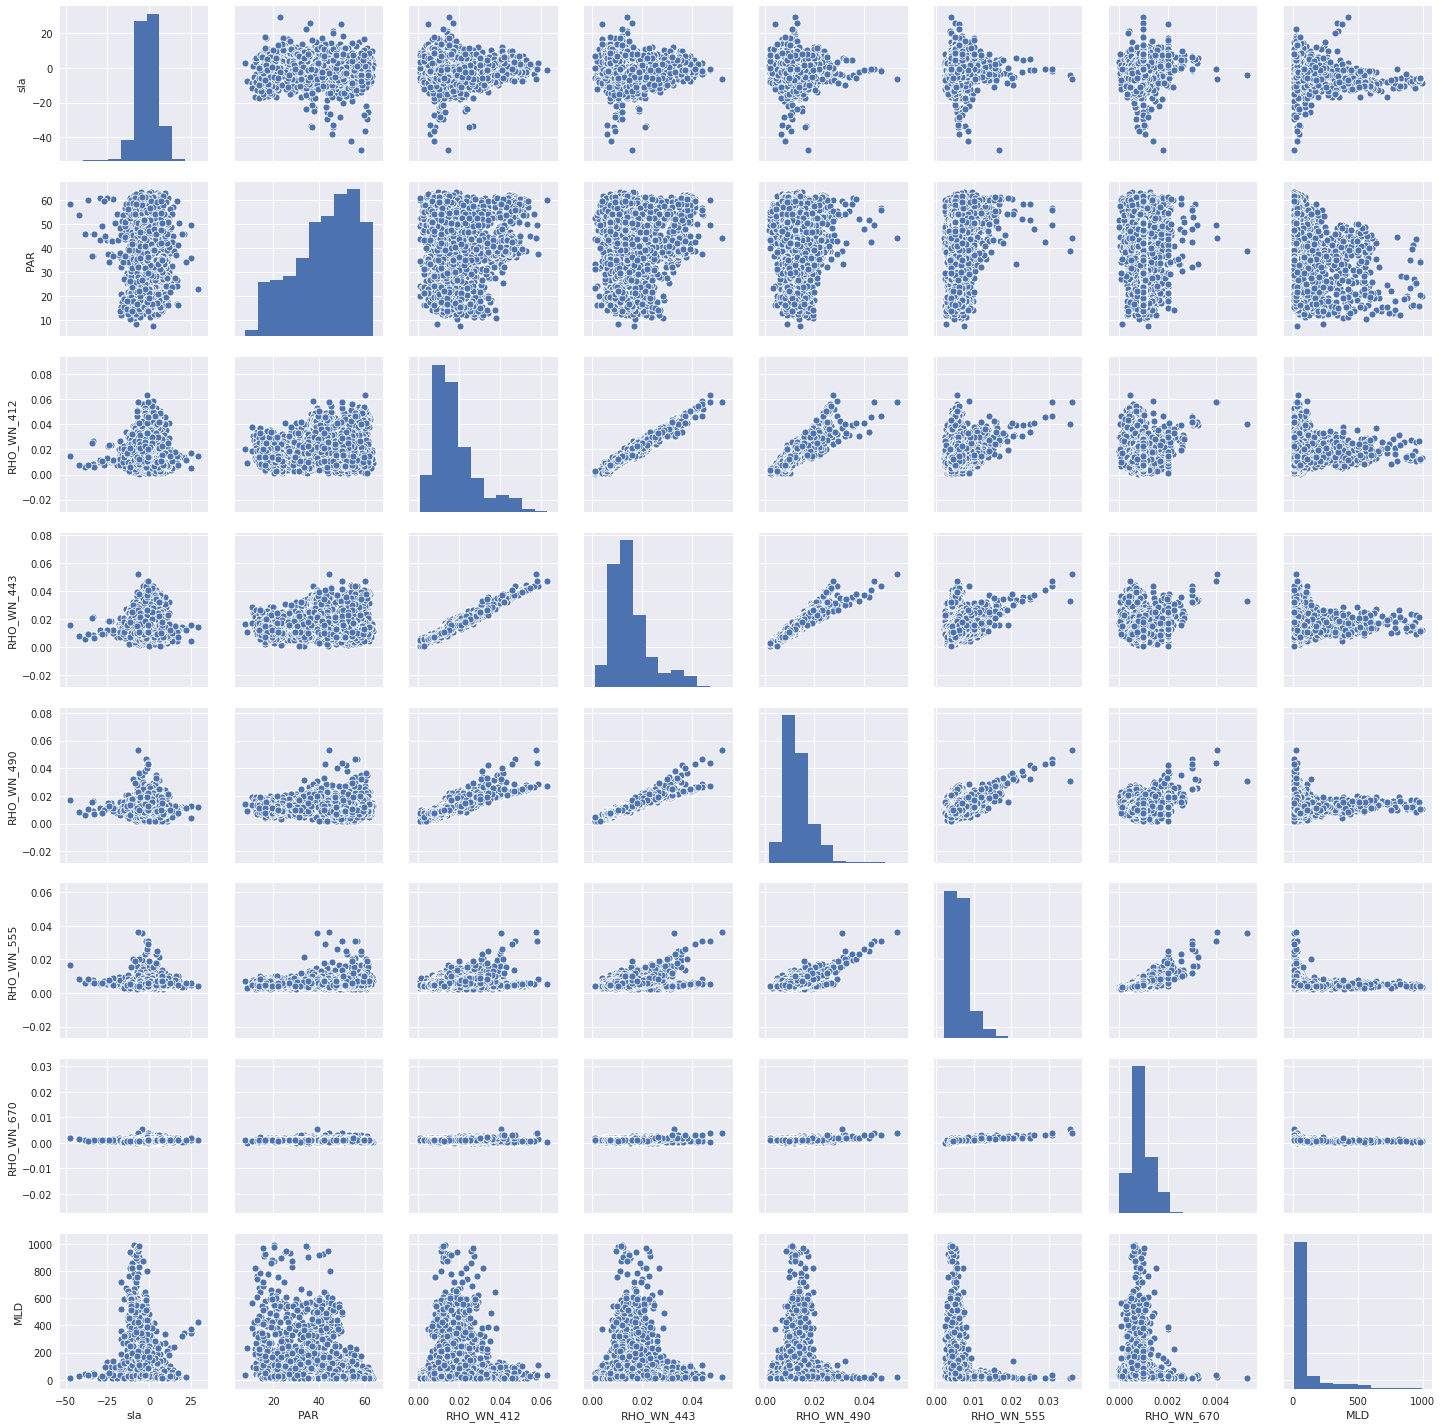

In [33]:
# unnormalized 

plot_pairplots(X_features)

### Normalized

<Figure size 720x720 with 0 Axes>

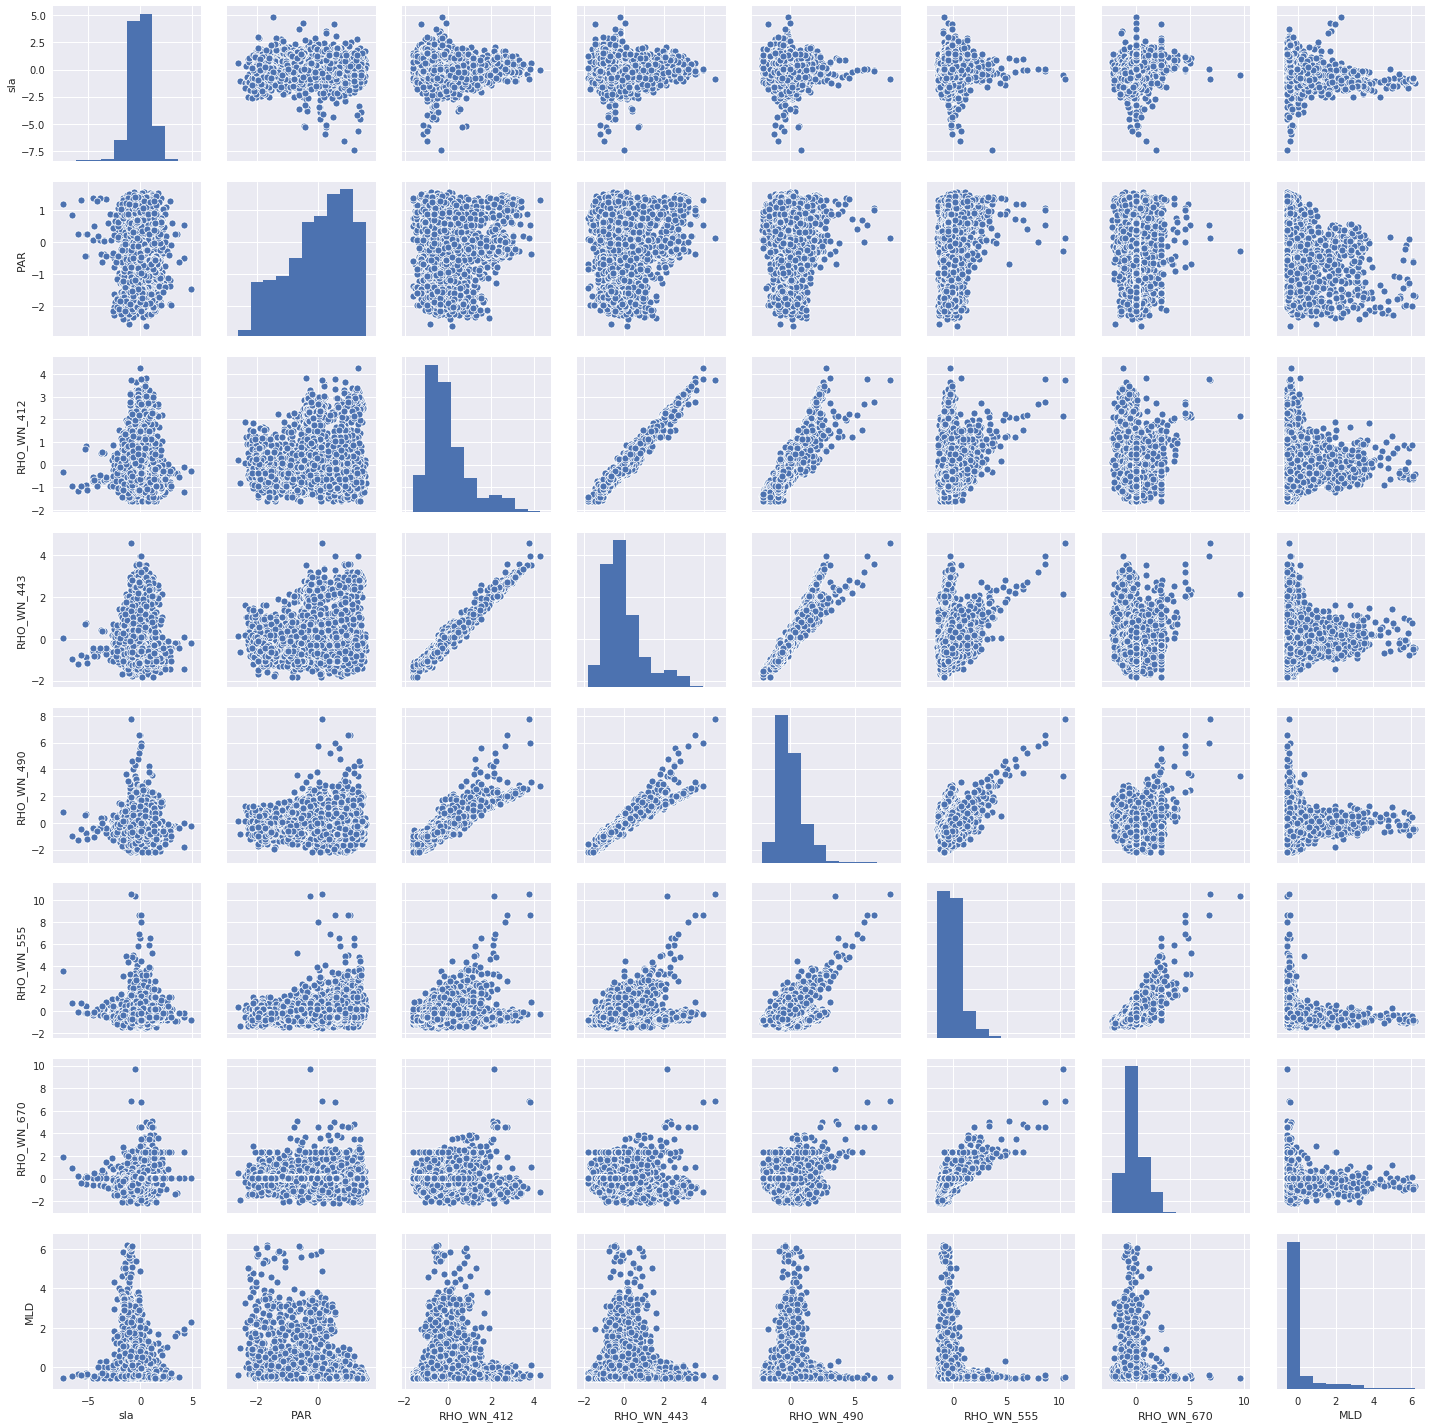

In [37]:
# normalized 
X_norm = StandardScaler().fit_transform(X_features)
X_norm = pd.DataFrame(X_norm, columns=X_features.columns)

# plot data
plot_pairplots(X_norm)

The normalized plots look OK actually. I don't think there will be much need to actually normalize this data.

### PairPlots - Outputs

So we were told that the output layer is something to consider. We have a very high dimensional output which I imagine will give us some problems. We will definitely have to reduce the dimensionality.

#### Profiles

Let's just look at the distribution of the data itself. 

In [85]:
Y_na.head()

wmo  n_cycle        X1        X3        X5       X7        X9      X11  \
0  3902122       42  0.000880  0.000870  0.000860  0.00088  0.000840  0.00086   
1  3902122       43  0.000830  0.000820  0.000800  0.00080  0.000794  0.00080   
2  3902122       49  0.000790  0.000830  0.000900  0.00078  0.000848  0.00090   
3  3902122       50  0.000775  0.000895  0.000783  0.00079  0.000830  0.00077   
4  3902122       51  0.000860  0.000920  0.000880  0.00092  0.000920  0.00084   

       X13       X15  ...      X955      X960     X965      X970      X975  \
0  0.00087  0.000873  ...  0.000256  0.000240  0.00022  0.000225  0.000240   
1  0.00080  0.000800  ...  0.000220  0.000230  0.00023  0.000230  0.000230   
2  0.00090  0.000900  ...  0.000230  0.000210  0.00022  0.000225  0.000223   
3  0.00077  0.000780  ...  0.000228  0.000240  0.00023  0.000230  0.000230   
4  0.00084  0.000890  ...  0.000220  0.000225  0.00023  0.000230  0.000230   

      X980     X985      X990      X995     X1000  
0  0.00024  0.00024  0.000240  0.000240  0.000240  
1  0.00023  0.00023  0.000251  0.000260  0.000260  
2  0.00024  0.00026  0.000380  0.000270  0.000270  
3  0.00024  0.00022  0.000270  0.000280  0.000280  
4  0.00024  0.00026  0.000235  0.000235  0.000235  

[5 rows x 278 columns]

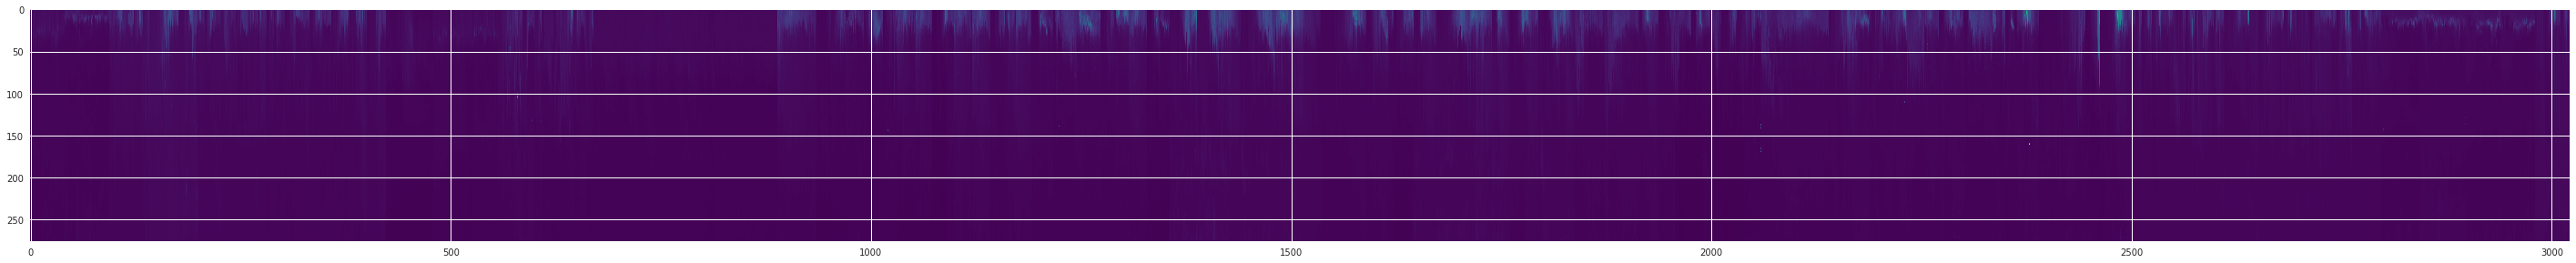

In [88]:
plt.figure(figsize=(50,50))
plt.imshow(Y_na.drop(meta_vars, axis=1).T, cmap='viridis')
# plt.xticks(labels=y.columns.values)
plt.show()

In [119]:
def plot_bbp_profile(dataframe: pd.DataFrame):
    norm = colors.LogNorm(vmin=Y.values.min(), vmax=Y.values.max())
    
    fig, ax = plt.subplots(figsize=(50,50))
    ax.imshow(Y.T, cmap='viridis', norm=norm)
    plt.show()

So first of all, we can't really see anything. So I'll have to adjust the scale a little bit. I'll use the log normal transformation.

In [94]:
import matplotlib.colors as colors

Y = Y_na.drop(meta_vars, axis=1)

norm = colors.LogNorm(vmin=Y.values.min(), vmax=Y.values.max())

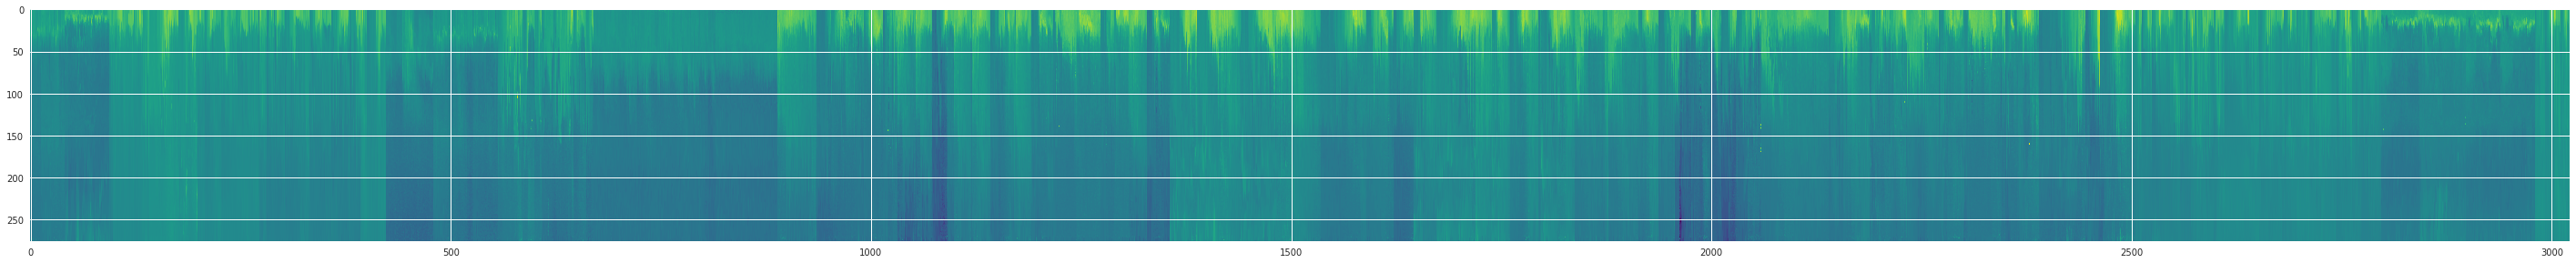

In [95]:
plt.figure(figsize=(50,50))
plt.imshow(Y.T, cmap='viridis', norm=norm)
# plt.xticks(labels=y.columns.values)
plt.show()

So this is a bit better. I think I also see a lot less extreme values. So that's quite nice.

## CONTROL GROUP II - Subtropical Gyres

So we will do the exact same analysis as above but for the 2nd control group. It will be less code because the functions are already above.

In [111]:
X_na, Y_na = load_control_data(control='stg')

In [112]:
X_features = X_na[CORE_VARS]

X_features.head()

sla      PAR  RHO_WN_412  RHO_WN_443  RHO_WN_490  RHO_WN_555  \
0  19.850199  35.6356    0.037567    0.029403    0.020264    0.004894   
1  19.360900  35.7430    0.036155    0.028722    0.019437    0.004475   
2   3.658199  63.8234    0.056097    0.043019    0.025556    0.005367   
3   0.672800  63.5382    0.052678    0.039138    0.023210    0.004321   
4 -10.379800  62.6472    0.049627    0.038268    0.023311    0.004684   

   RHO_WN_670  MLD  
0    0.000560   40  
1    0.000149   10  
2    0.000575   10  
3    0.000358   10  
4    0.000510   10

In [113]:
X_features.describe()

sla          PAR   RHO_WN_412   RHO_WN_443   RHO_WN_490  \
count  1486.000000  1486.000000  1486.000000  1486.000000  1486.000000   
mean      1.638224    47.677969     0.048893     0.036750     0.022760   
std       6.830798    10.594949     0.010345     0.006920     0.002832   
min     -20.751599    27.726300     0.014931     0.015627     0.012073   
25%      -2.407725    37.646975     0.042085     0.032025     0.020937   
50%       1.422450    45.771700     0.048925     0.036802     0.022995   
75%       5.376425    58.763150     0.057000     0.041904     0.024736   
max      33.062599    67.356800     0.077000     0.055167     0.033292   

        RHO_WN_555    RHO_WN_670          MLD  
count  1486.000000  1.486000e+03  1486.000000  
mean      0.004863  6.208601e-04    53.334455  
std       0.000740  2.340827e-04    31.431297  
min       0.002241  2.737260e-09    10.000000  
25%       0.004428  4.757155e-04    32.000000  
50%       0.004894  5.831605e-04    48.000000  
75%       0.005192  7.523037e-04    71.000000  
max       0.008618  1.549230e-03   194.000000

Immediate note: we have less data. That's never the optimum solution. But it is what it is.

In [114]:
gpd_df = get_geodataframe(X_na)

gpd_df.head()

wmo  n_cycle        sla      PAR  RHO_WN_412  RHO_WN_443  RHO_WN_490  \
0  1901347       12  19.850199  35.6356    0.037567    0.029403    0.020264   
1  1901347       16  19.360900  35.7430    0.036155    0.028722    0.019437   
2  1901347      186   3.658199  63.8234    0.056097    0.043019    0.025556   
3  1901347      189   0.672800  63.5382    0.052678    0.039138    0.023210   
4  1901347      195 -10.379800  62.6472    0.049627    0.038268    0.023311   

   RHO_WN_555  RHO_WN_670  MLD        lon        lat  doy  \
0    0.004894    0.000560   40  78.149099 -20.609199  192   
1    0.004475    0.000149   10  78.030200 -20.651700  194   
2    0.005367    0.000575   10  72.087800 -20.514000    4   
3    0.004321    0.000358   10  71.725799 -20.484700   13   
4    0.004684    0.000510   10  71.283800 -20.956100   31   

                     geometry  
0  POINT (78.14910 -20.60920)  
1  POINT (78.03020 -20.65170)  
2  POINT (72.08780 -20.51400)  
3  POINT (71.72580 -20.48470)  
4  POINT (71.28380 -20.95610)

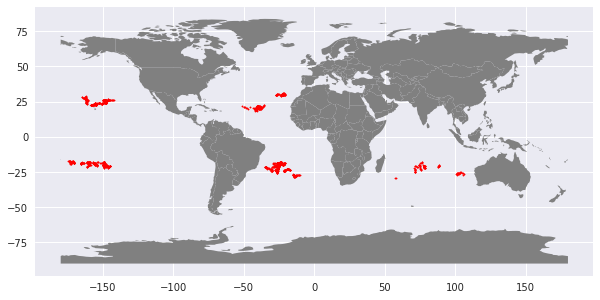

In [115]:
plot_geolocations(gpd_df)

Definitely interesting that the locations are way more spread out and in clustered regions. There is also some overlap in a particular region of the data.

<Figure size 720x720 with 0 Axes>

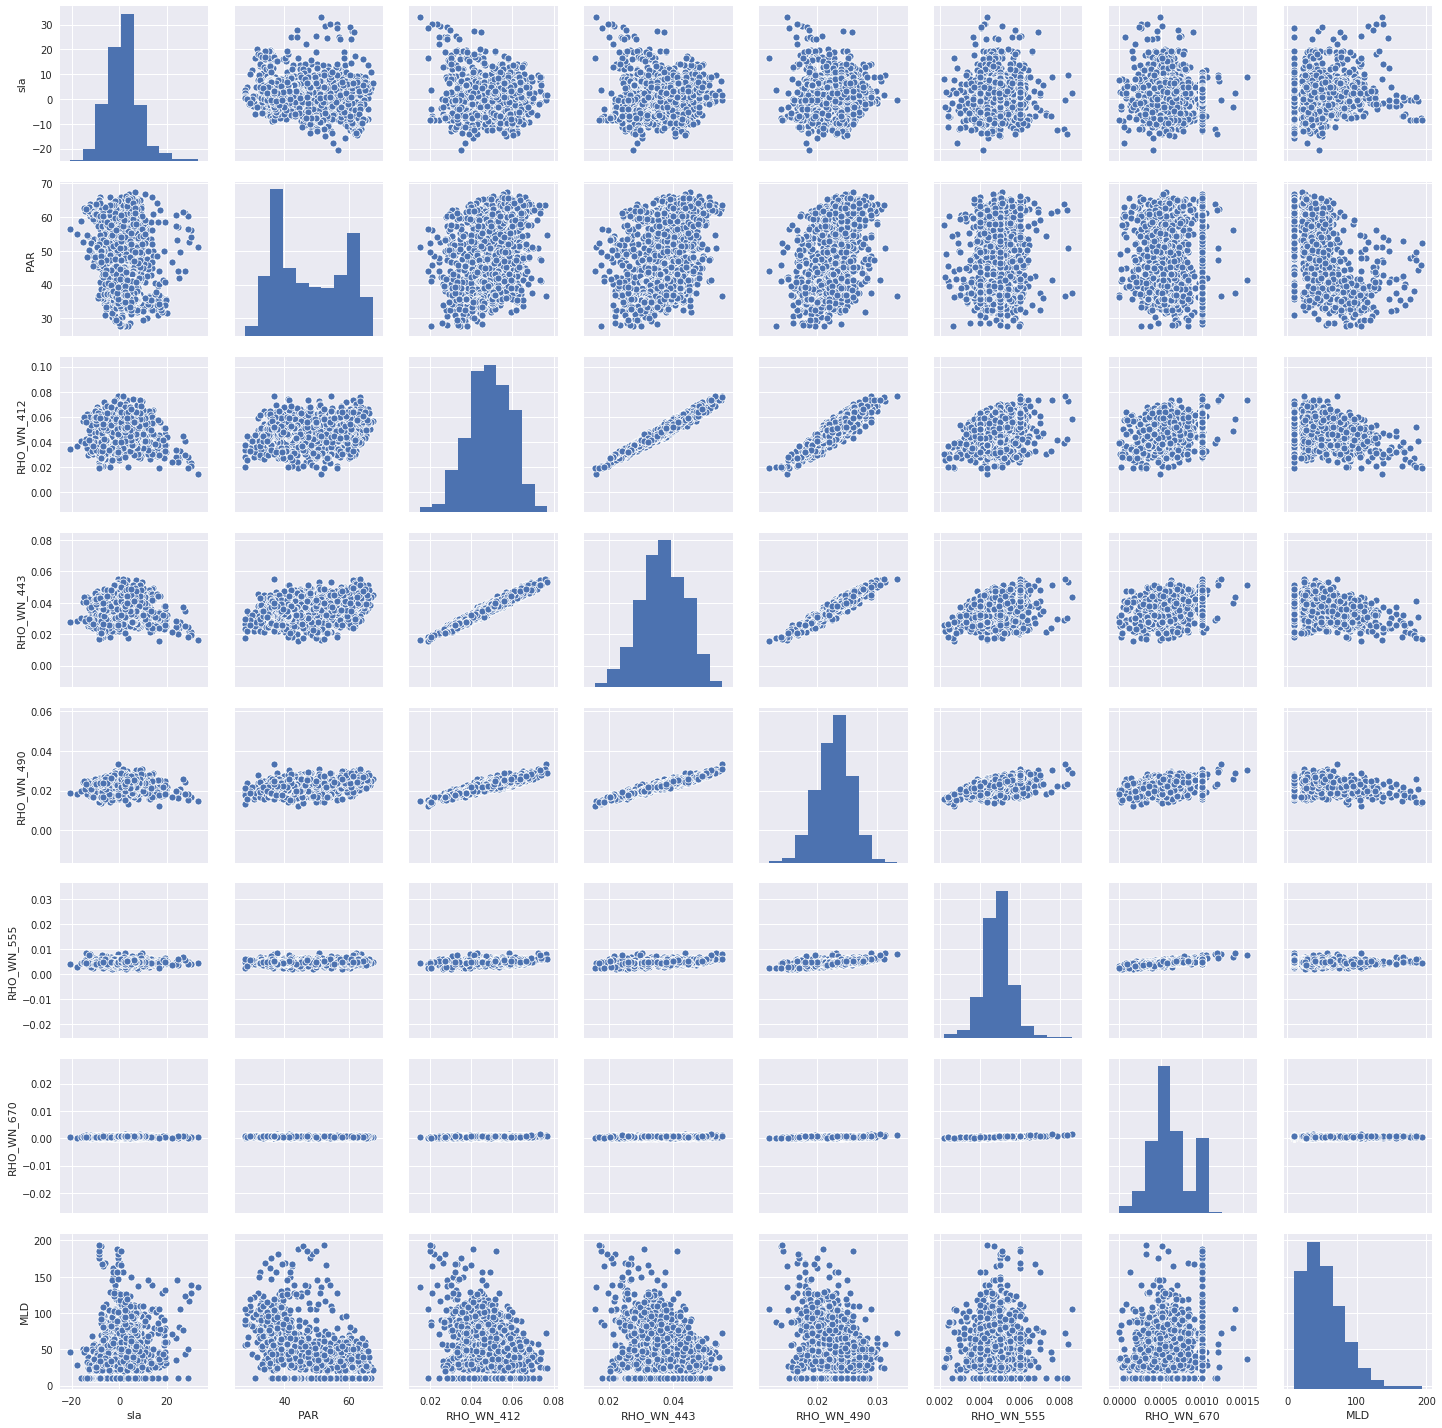

In [116]:
plot_pairplots(X_features)

<Figure size 720x720 with 0 Axes>

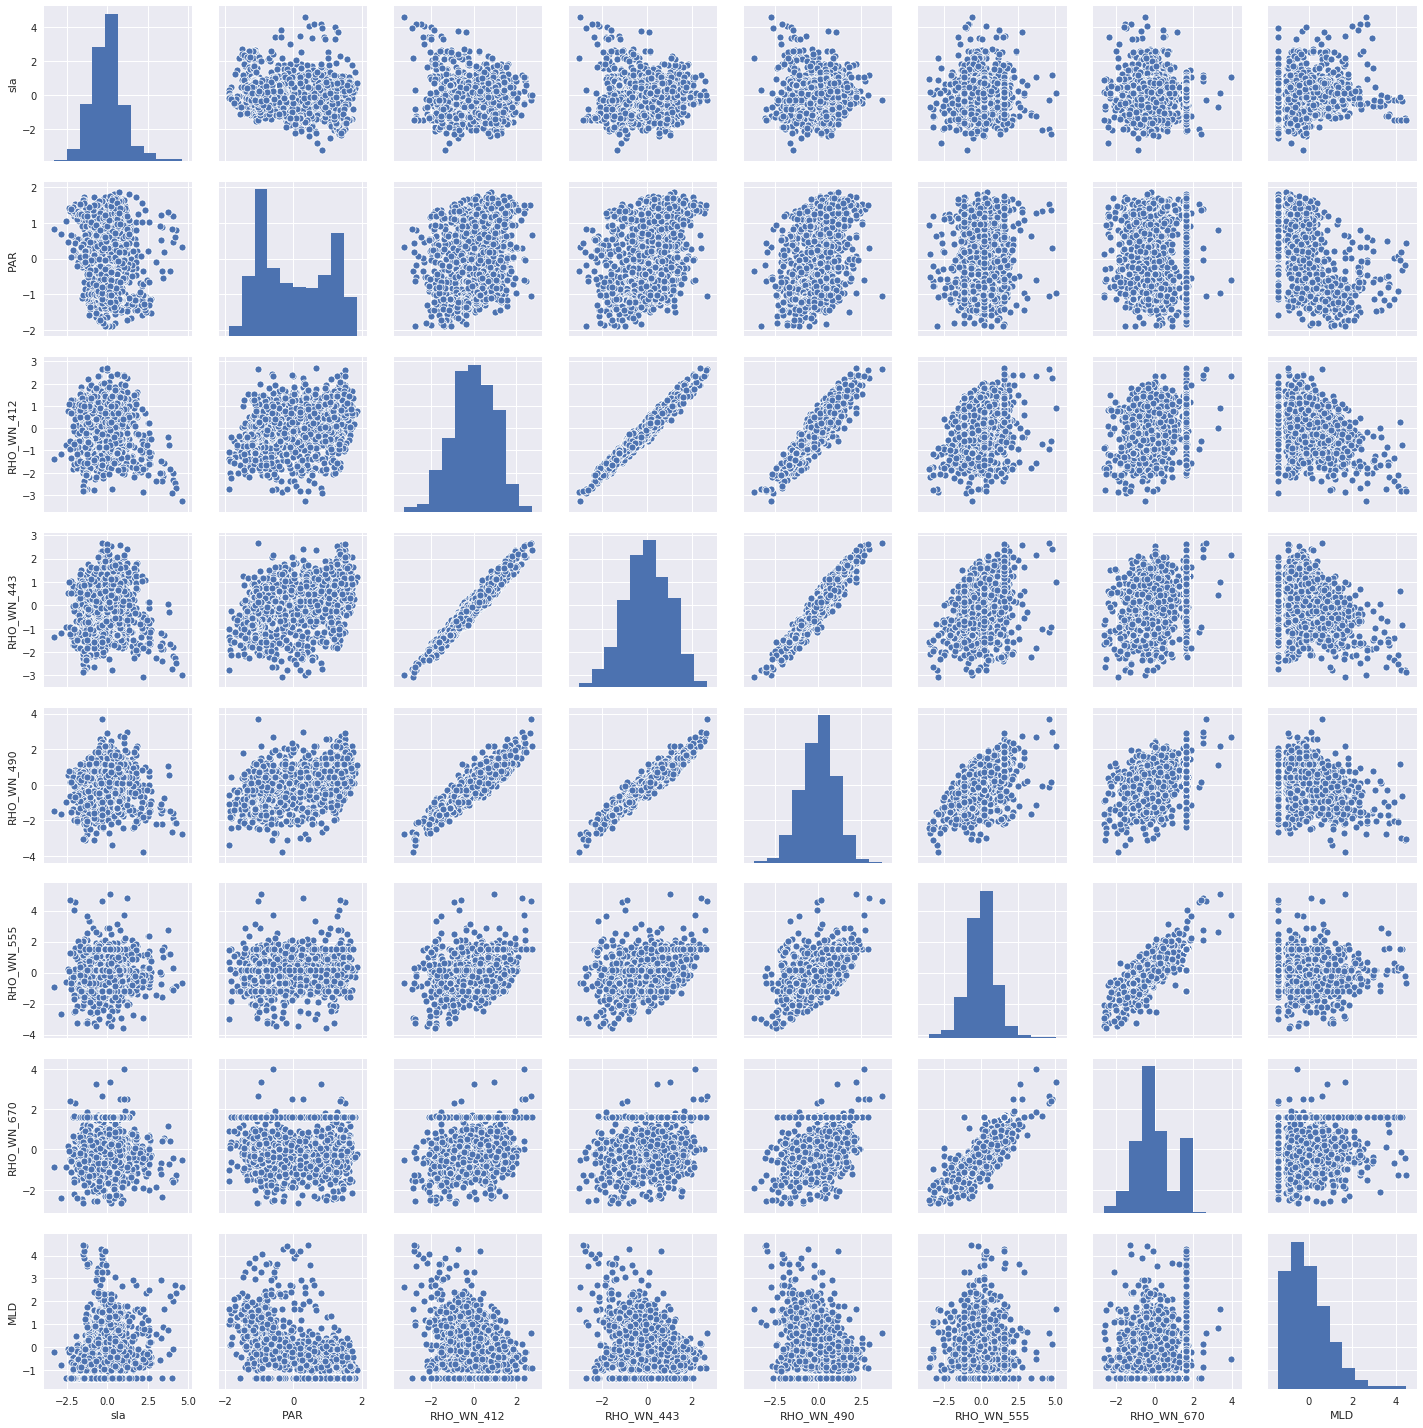

In [117]:
# normalized 
X_norm = StandardScaler().fit_transform(X_features)
X_norm = pd.DataFrame(X_norm, columns=X_features.columns)

# plot data
plot_pairplots(X_norm)

### Profiles

In [118]:
Y_na.head()

wmo  n_cycle       X1       X3       X5       X7       X9       X11  \
0  1901347        4  0.00060  0.00060  0.00060  0.00060  0.00060  0.000600   
1  1901347       12  0.00061  0.00061  0.00061  0.00061  0.00061  0.000610   
2  1901347       16  0.00060  0.00060  0.00060  0.00060  0.00060  0.000600   
3  1901347       24  0.00059  0.00059  0.00059  0.00059  0.00059  0.000590   
4  1901347       28  0.00059  0.00059  0.00059  0.00059  0.00059  0.000585   

        X13       X15  ...     X955      X960     X965     X970     X975  \
0  0.000600  0.000600  ...  0.00028  0.000280  0.00028  0.00028  0.00028   
1  0.000604  0.000594  ...  0.00028  0.000271  0.00028  0.00028  0.00028   
2  0.000595  0.000590  ...  0.00027  0.000270  0.00027  0.00027  0.00027   
3  0.000590  0.000590  ...  0.00027  0.000270  0.00027  0.00027  0.00028   
4  0.000580  0.000585  ...  0.00027  0.000270  0.00027  0.00027  0.00027   

      X980     X985     X990     X995    X1000  
0  0.00028  0.00028  0.00028  0.00028  0.00028  
1  0.00028  0.00028  0.00028  0.00028  0.00028  
2  0.00027  0.00027  0.00027  0.00027  0.00027  
3  0.00028  0.00028  0.00028  0.00028  0.00028  
4  0.00027  0.00027  0.00027  0.00027  0.00027  

[5 rows x 278 columns]

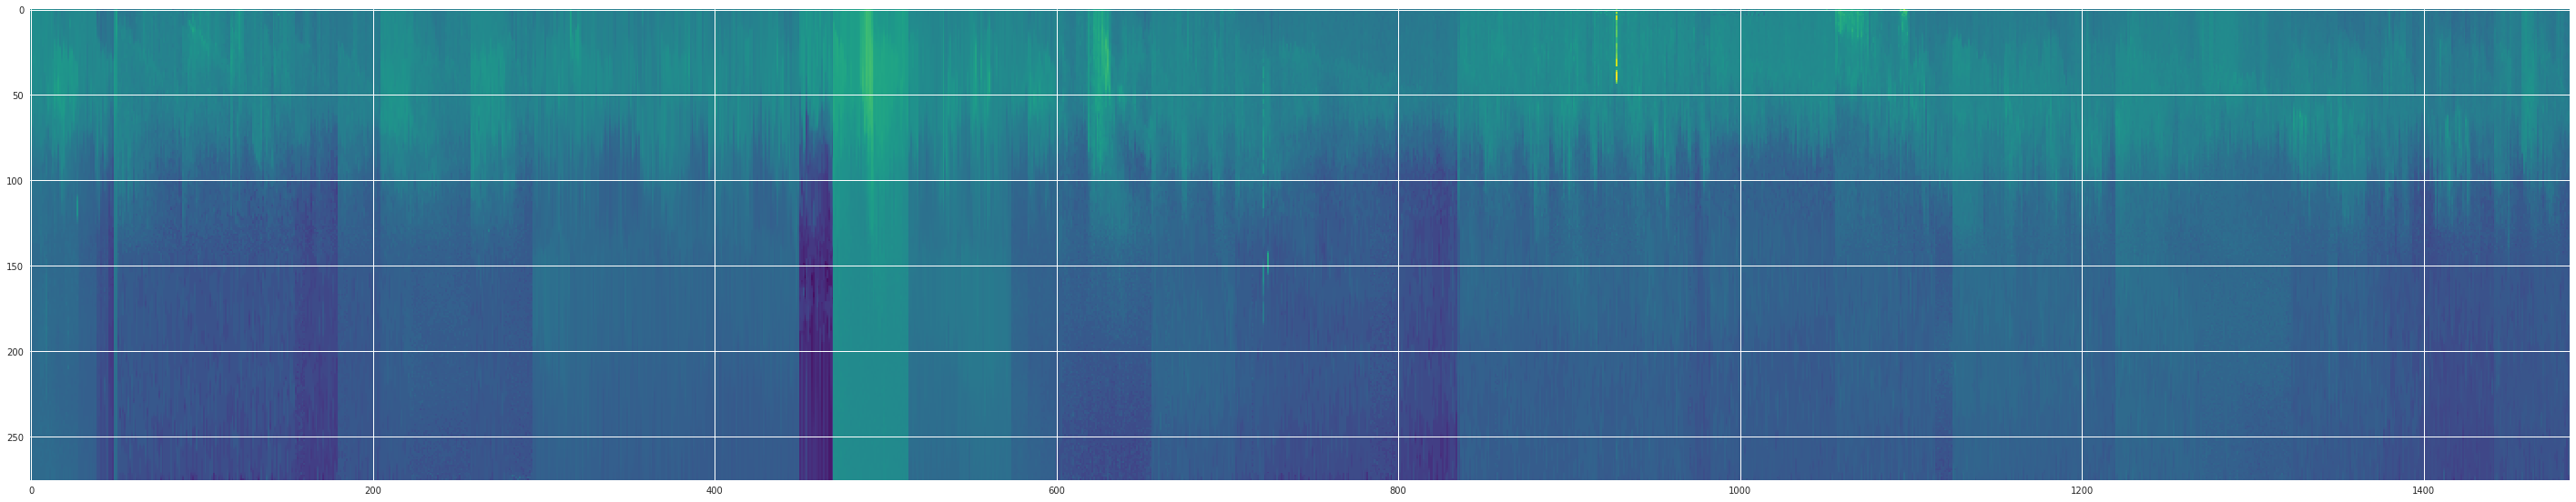

In [120]:
Y = Y_na.drop(meta_vars, axis=1)

plot_bbp_profile(Y)

So I see a bit more values that are statistically higher here. Not sure what that means but relatively speaking we have more spead in our data.